## **k-Means Clustering**

Goal: to minimize the variance in the clusters. $k$ is the number of clusters and we need to know in advance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA630/refs/heads/master/data/Netflix_movies_and_tv_shows_clustering.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [2]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [5]:
## Cluster according to the description
df['description'].iloc[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

**Vectorization**

* `CountVectorizer`
* `TfidfVectorizer`

or

* pre-trained embedding model

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

## instance
vectorizer = TfidfVectorizer(stop_words='english', max_features=300)

## fit and transform
X = vectorizer.fit_transform(df['description'])
X = X.toarray()

In [26]:
X.shape

(7787, 300)

In [22]:
# sparse to dense
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
## dataframe
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,accident,action,adventure,adventures,agent,ambitious,america,american,amid,army,...,woman,women,work,working,world,writer,year,years,york,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53255,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.376308,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [10]:
## How many clusters? k
## You can use Principal Components
## PC1 (information about the 300 tokens - most variation - information)
## PC2 (information about the 300 tokens - not on PC1)
from sklearn.decomposition import PCA

## instance
pca = PCA(n_components=2)

## fit and transform
X_pca = pca.fit_transform(X)

In [12]:
## DataFrame
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca.head()

,PC1,PC2
0,-0.036108,-0.045042
1,0.050204,0.335288
2,-0.027036,-0.053408
3,-0.178317,-0.047960
4,-0.058933,-0.060373


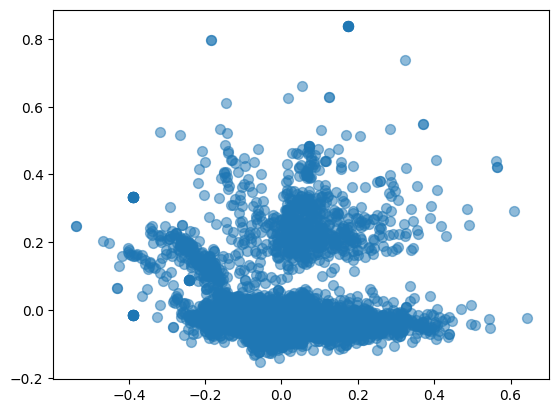

In [13]:
## scatter plot of PCs
plt.scatter(X_pca['PC1'], X_pca['PC2'], s = 50, alpha = 0.5)
plt.show()

In [23]:
X = X.toarray()

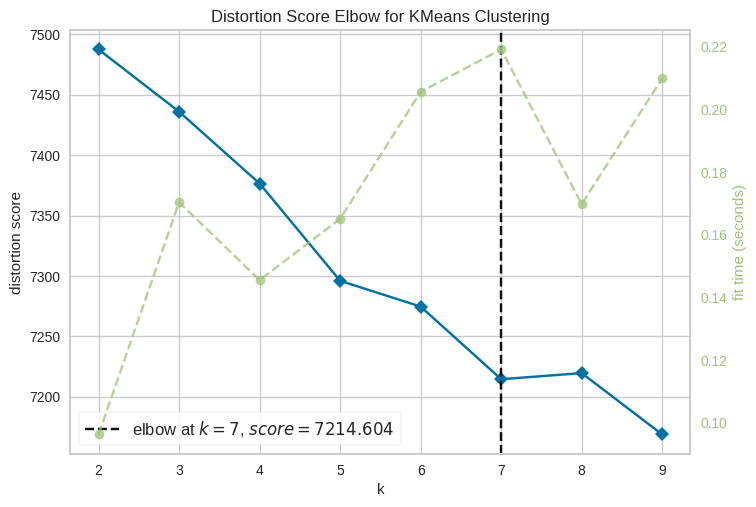

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
## Elbow method (not guaranteed to converse)
## stochastic (variation - if I run different times, I might get different answers)
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

## instance of KMeans
model = KMeans()

## instance of KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X)
visualizer.show()

In [29]:
## let's select 5 clusters


## instance of KMeans
model = KMeans(n_clusters=5)

## fit and predict
clusters = model.fit_predict(X)

In [31]:
df['Cluster'] = clusters

In [35]:
df[['title', 'type', 'description', 'Cluster']]

,title,type,description,Cluster
0,3%,TV Show,In a future where the elite inhabit an island ...,3
1,7:19,Movie,After a devastating earthquake hits Mexico Cit...,3
2,23:59,Movie,"When an army recruit is found dead, his fellow...",3
3,9,Movie,"In a postapocalyptic world, rag-doll robots hi...",1
4,21,Movie,A brilliant group of students become card-coun...,3
...,...,...,...,...
7782,Zozo,Movie,When Lebanon's Civil War deprives Zozo of his ...,3
7783,Zubaan,Movie,A scrappy but poor boy worms his way into a ty...,3
7784,Zulu Man in Japan,Movie,"In this documentary, South African rapper Nast...",1
7785,Zumbo's Just Desserts,TV Show,Dessert wizard Adriano Zumbo looks for the nex...,3


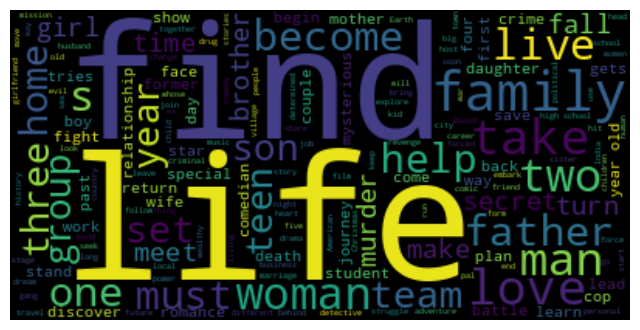

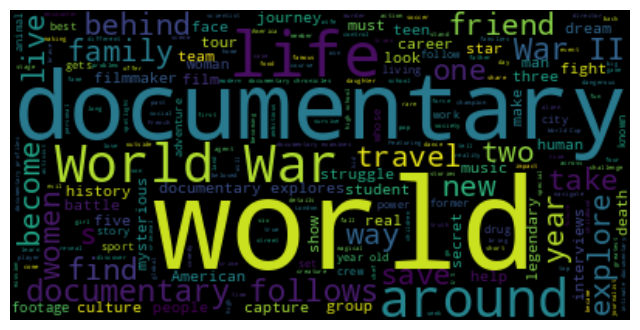

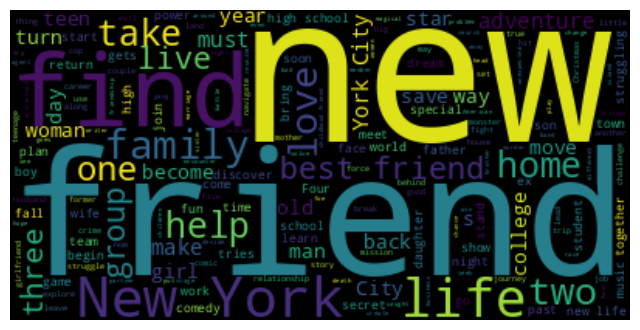

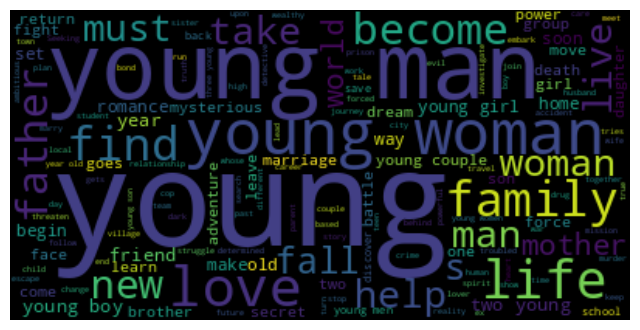

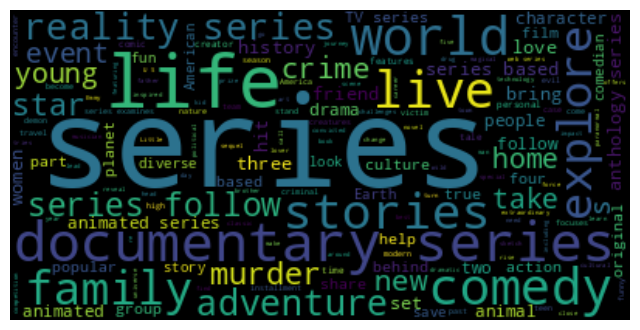

In [37]:
from wordcloud import WordCloud

## plot wordcloud by cluster
for cluster in df['Cluster'].unique():
  text = ' '.join(df[df['Cluster'] == cluster]['description'])
  wordcloud = WordCloud().generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

**Embedddings**

In [ ]:
from sentence_transformers import SentenceTransformer

## instance
embedding = SentenceTransformer('all-MiniLM-L6-v2')

## encode (instead of TF-IDF)
X = embedding.encode(df['description']

In [39]:
## repeat all the KMeans Algorithm with this
## Elbow Method (find k)
## Fit KMeans with k
X.shape

(7787, 384)